In [1]:
import pandas as pd
import pandas_profiling
import seaborn as sns

In [2]:
data = pd.read_csv('tableau_project.csv')

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
data.shape

(3864, 22)

In [5]:
data.head()

,Unnamed: 0,journey_id,vehicle_type_id,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,price,price_distance,price_duration,distance,duration,source,rider_waiting_time,driver_waiting_time,price_supplements,discount,rating
0,0,93e6d216088af74c32183283d4bb2953,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-12-16 11:08:59,19.431363,-99.195362,2017-12-16 11:37:32,19.406438,-99.175260,drop off,"5,866","5,204",0,"7,943","1,058",Android,590,48,662,0,9.0
1,1,444b084ec64244919afadfba879876a3,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-12-16 11:06:16,19.431567,-99.195368,2017-12-16 11:07:21,NaN,NaN,rider cancel,0,0,0,0,0,iPhone,NaN,NaN,0,0,9.0
2,2,dbcc57f4e7606a71c74c6e4666a977a4,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-11-24 22:58:37,19.422052,-99.174499,2017-11-24 23:27:05,19.438666,-99.180821,drop off,"4,000","3,552",0,"3,054",689,Android,923,4,0,0,10.0
3,3,1ffe9a24033847148c683574985df56c,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-12-16 09:17:08,19.433119,-99.154844,2017-12-16 09:17:30,19.290148,-99.144407,rider cancel,0,0,0,0,0,iPhone,NaN,NaN,0,0,9.0
4,4,fb1ef7d070724482a33be41f27737ea5,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-11-24 18:11:00,19.440996,-99.183581,2017-11-24 18:31:31,19.422815,-99.174865,drop off,"4,000","2,974",12,"2,859",887,iPhone,329,36,0,0,8.0


In [6]:
pandas_profiling.ProfileReport(data)

Number of variables,22
Number of observations,3864
Total Missing (%),5.4%
Total size in memory,664.2 KiB
Average record size in memory,176.0 B
Numeric,6
Categorical,14
Boolean,0
Date,0
Text (Unique),2
Rejected,0


In [7]:
# eliminar los viajes cancelados
data = data[data['end_state'] == 'drop off']
data.shape

(2685, 22)

In [8]:
# contar nulls
null_cols = data.isnull().sum()
null_cols

Unnamed: 0              0
journey_id              0
vehicle_type_id         0
start_type              0
start_at                0
start_lat               0
start_lon               0
end_at                  0
end_lat                47
end_lon                47
end_state               0
price                   0
price_distance          0
price_duration          0
distance                0
duration                0
source                  0
rider_waiting_time      0
driver_waiting_time     0
price_supplements       0
discount                0
rating                  0
dtype: int64

In [9]:
# vamos a eliminar los registros con esta falta de datos
data = data[pd.notnull(data['end_lat'])]
data.shape

(2638, 22)

In [10]:
null_cols = data.isnull().sum()
null_cols

Unnamed: 0             0
journey_id             0
vehicle_type_id        0
start_type             0
start_at               0
start_lat              0
start_lon              0
end_at                 0
end_lat                0
end_lon                0
end_state              0
price                  0
price_distance         0
price_duration         0
distance               0
duration               0
source                 0
rider_waiting_time     0
driver_waiting_time    0
price_supplements      0
discount               0
rating                 0
dtype: int64

In [11]:
# hay variables numéricas como categóricas
# los precios contienen comas en vez de puntos, por lo que hay que hacer replace
def price_to_float(s):
        return float(s.replace(',', ''))/100

# def price_to_float(column):
#     return column.str.replace(",","").astype(float)
# data["price"] = data["price"].str.replace(",","").astype(float)

In [12]:
data["price"] = data["price"].map(price_to_float)
data["price_distance"] = data["price_distance"].map(price_to_float)
data["price_duration"] = data["price_duration"].map(price_to_float)
data["price_supplements"] = data["price_supplements"].map(price_to_float)

In [13]:
noprice = data[data['price'] == 0]
print(len(noprice))
noprice.head()

3


,Unnamed: 0,journey_id,vehicle_type_id,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,price,price_distance,price_duration,distance,duration,source,rider_waiting_time,driver_waiting_time,price_supplements,discount,rating
919,919,8ad5e46e06566d8fc9ff06cf15be71f0,21620ea5749f2e0679a8c72c7fbafb9e,asap,2017-06-07 12:58:33,19.438148,-99.181069,2017-06-07 13:05:32,19.422749,-99.174937,drop off,0.0,9.61,0.53,"1,071",394,Android,15,51,0.0,0,9.0
2809,2809,a73e8dc2a6264e80b95e3b709828623e,21620ea5749f2e0679a8c72c7fbafb9e,asap,2017-05-23 12:53:31,19.356000,-99.275269,2017-05-23 13:50:20,19.441356,-99.183848,drop off,0.0,110.87,0.00,"9,483","2,149",iPhone,"1,235",5,0.0,0,9.0
2972,2972,2d7b639b59b14565987ff1e83f6aaf2a,21620ea5749f2e0679a8c72c7fbafb9e,asap,2017-04-21 18:03:56,19.425436,-99.178435,2017-04-21 18:16:44,19.415074,-99.170272,drop off,0.0,0.26,0.00,415,421,iPhone,317,21,0.0,0,9.0


In [14]:
# eliminamos las filas que tengan precio 0
data = data[data['price'] != 0]
data.shape

(2635, 22)

In [15]:
data.head()

,Unnamed: 0,journey_id,vehicle_type_id,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,price,price_distance,price_duration,distance,duration,source,rider_waiting_time,driver_waiting_time,price_supplements,discount,rating
0,0,93e6d216088af74c32183283d4bb2953,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-12-16 11:08:59,19.431363,-99.195362,2017-12-16 11:37:32,19.406438,-99.175260,drop off,58.66,52.04,0.00,"7,943","1,058",Android,590,48,6.62,0,9.0
2,2,dbcc57f4e7606a71c74c6e4666a977a4,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-11-24 22:58:37,19.422052,-99.174499,2017-11-24 23:27:05,19.438666,-99.180821,drop off,40.00,35.52,0.00,"3,054",689,Android,923,4,0.00,0,10.0
4,4,fb1ef7d070724482a33be41f27737ea5,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-11-24 18:11:00,19.440996,-99.183581,2017-11-24 18:31:31,19.422815,-99.174865,drop off,40.00,29.74,0.12,"2,859",887,iPhone,329,36,0.00,0,8.0
5,5,310f2f7103dd41c9811bffa771776648,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-11-24 15:34:53,19.421856,-99.174361,2017-11-24 15:53:30,19.440311,-99.184146,drop off,40.00,33.46,2.90,"3,176","1,028",iPhone,73,369,0.00,0,8.0
7,7,643a2da9e5f9457ab4a1706875c92d10,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-11-24 15:09:29,19.419962,-99.171955,2017-11-24 15:47:42,19.441434,-99.183503,drop off,64.49,43.67,20.82,"3,008","1,505",iPhone,770,799,0.00,0,10.0


In [16]:
data.describe()

,Unnamed: 0,start_lat,start_lon,end_lat,end_lon,price,price_distance,price_duration,price_supplements,rating
count,2635.000000,2635.000000,2635.000000,2635.000000,2635.000000,2635.000000,2635.000000,2635.000000,2635.000000,2635.000000
mean,1971.125617,19.411867,-99.194583,19.411100,-99.197792,73.247180,60.926581,2.748311,0.552619,8.211006
std,1111.738845,0.028498,0.041569,0.029957,0.044519,61.665417,53.659483,11.863988,4.288237,1.270344
min,0.000000,19.290513,-99.279825,19.211702,-99.568654,40.000000,0.000000,0.000000,0.000000,4.000000
25%,1011.000000,19.406138,-99.204161,19.377219,-99.253980,40.000000,31.930000,0.000000,0.000000,7.000000
50%,1959.000000,19.422749,-99.175121,19.422749,-99.180821,45.000000,42.040000,0.000000,0.000000,8.000000
75%,2939.500000,19.425436,-99.170483,19.430086,-99.171955,85.455000,64.530000,0.195000,0.000000,9.000000
max,3860.000000,19.502314,-99.051114,19.517451,-99.048817,1745.540000,1241.210000,428.330000,124.210000,10.000000


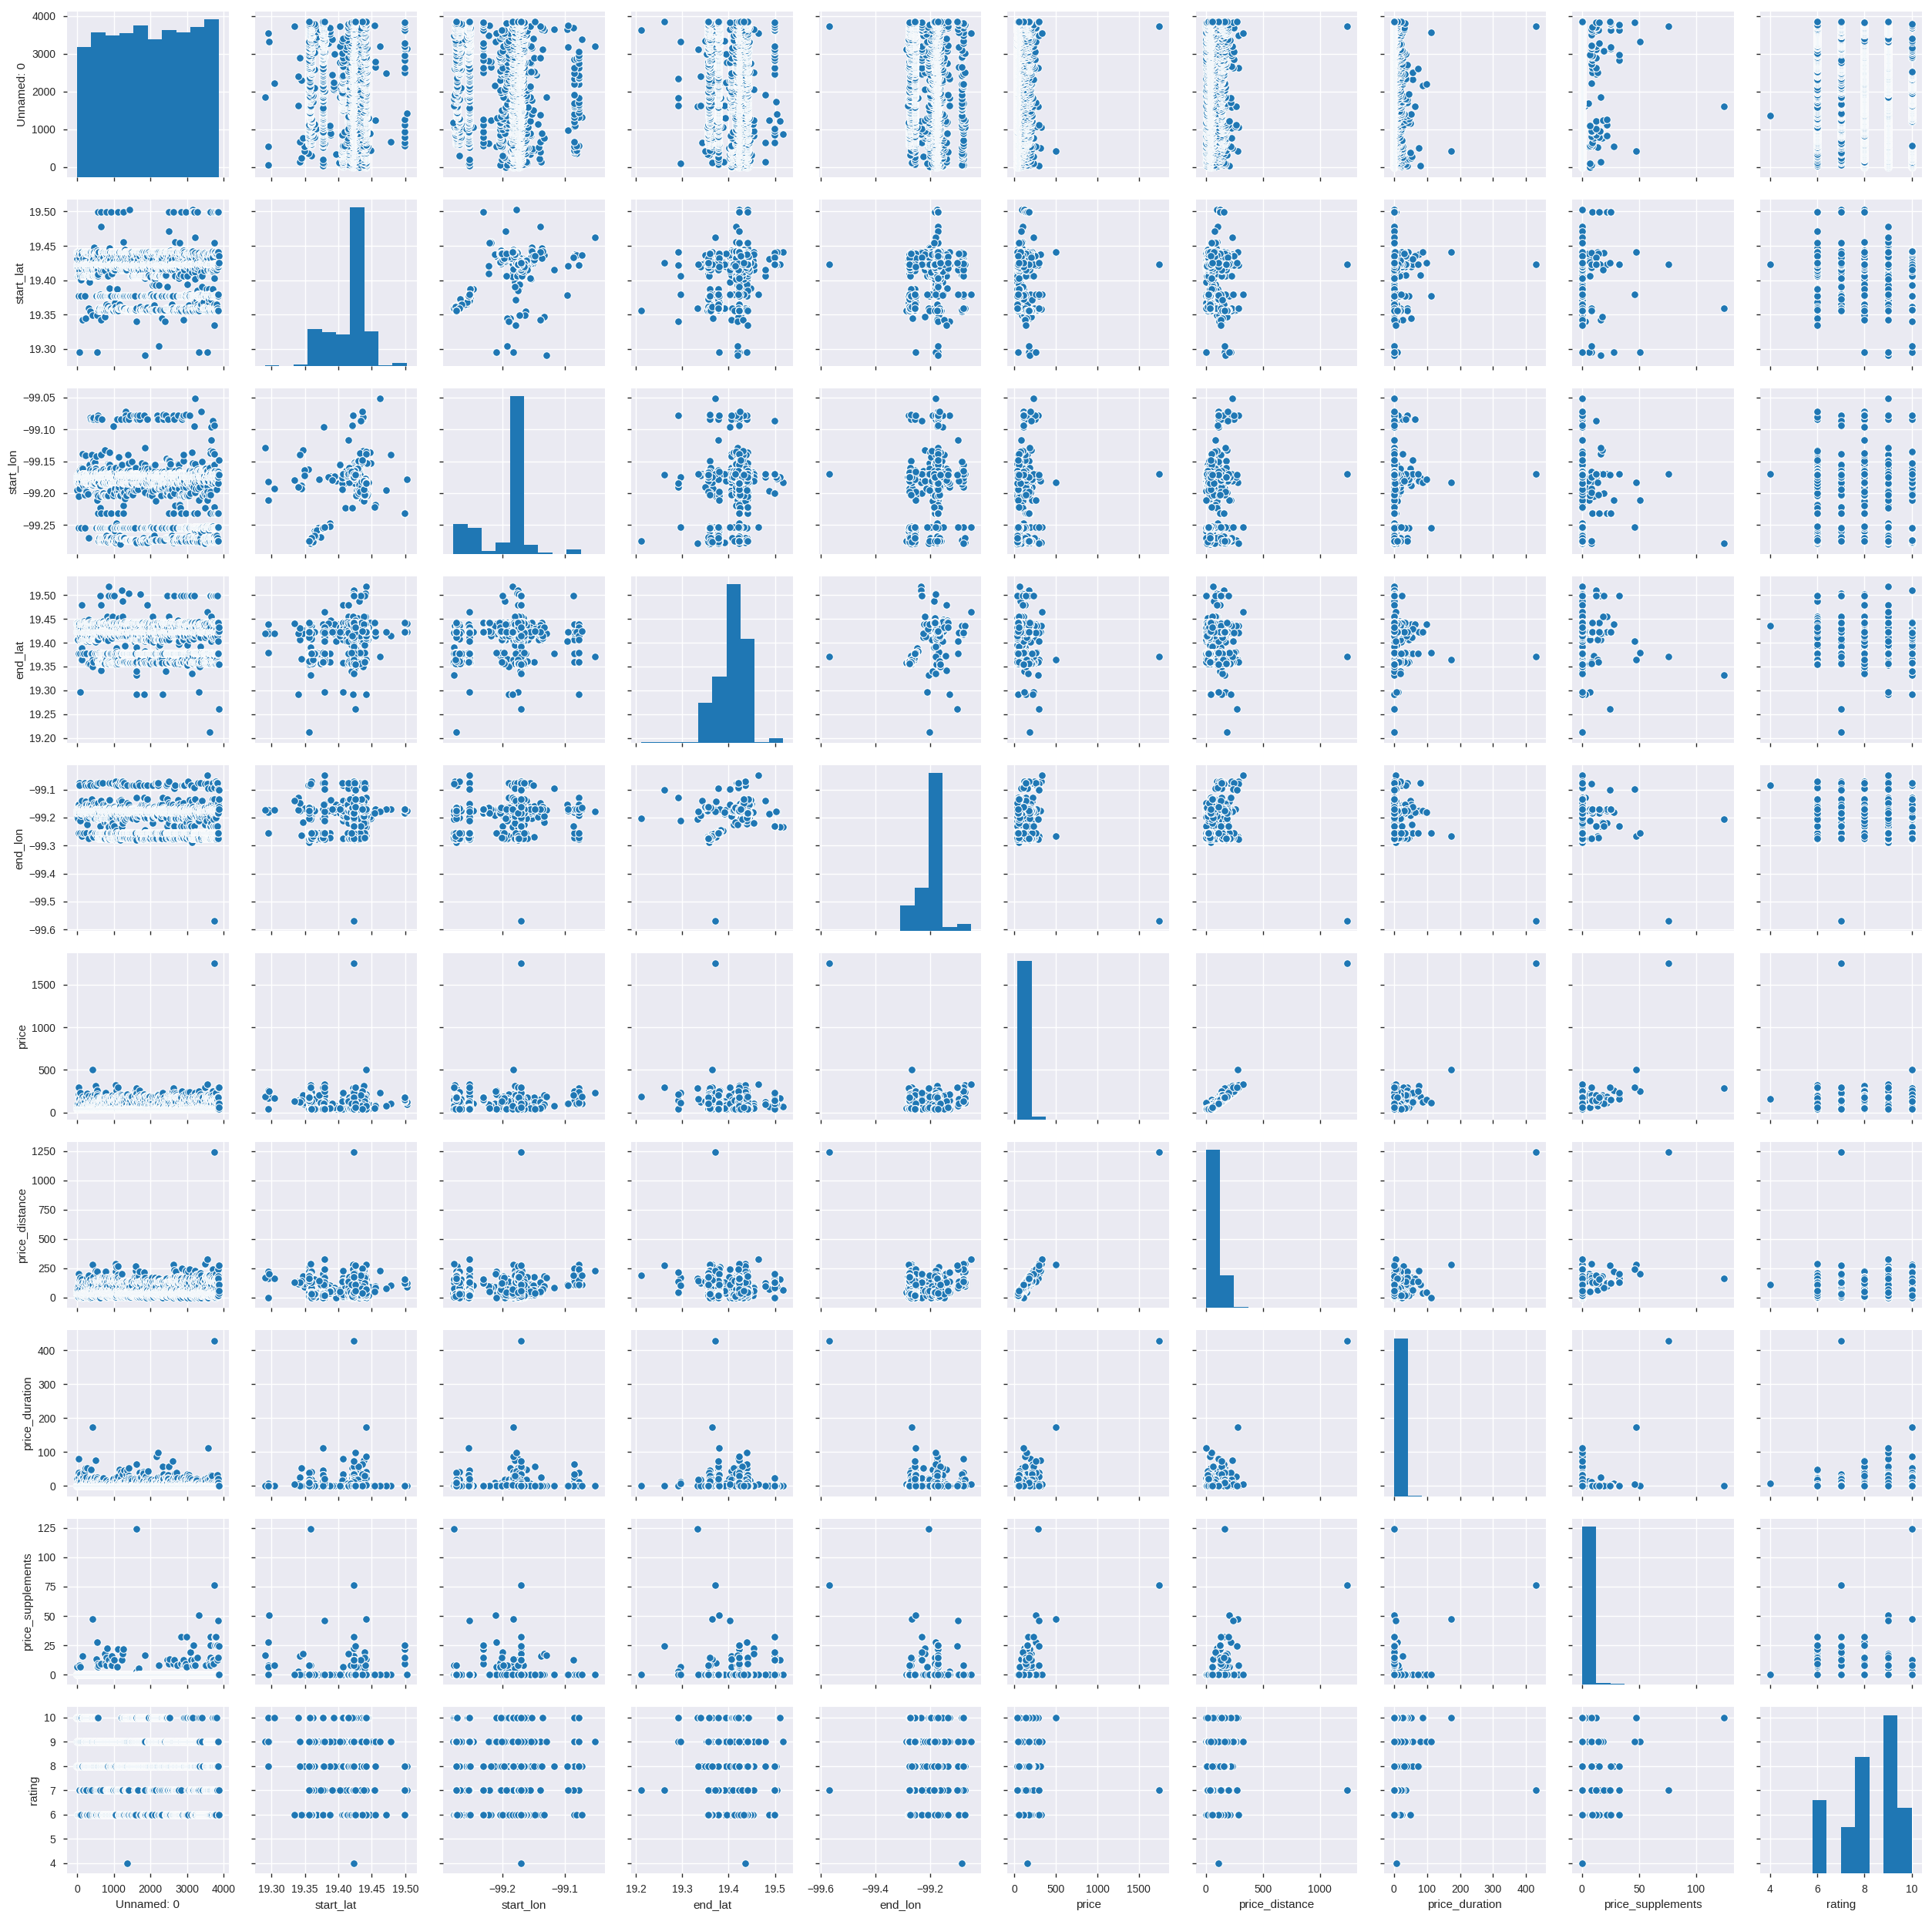

In [17]:
sns.pairplot(data = data)